<a href="https://colab.research.google.com/github/sravanireddy23/Machine-Learning/blob/main/RandomForestClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Random Forest Project

# Importing Libraries


Import the usual libraries for pandas and plotting. You can import sklearn later on.

In [39]:
#importing all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Getting the Data

Using pandas to read loan_data.csv as a dataframe called loans.


In [40]:
loans=pd.read_csv('loan_data.csv')

Checking  out the info(), head(), and describe() methods on loans.

In [41]:
#using info() methods to get the summary of the dataframe  like column,datatype,non-null count
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [42]:
#using describe() method to get statistical summary for numerical columns of the data
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


# Exploratory Data Analysis


 Creating  a histogram of two FICO distributions on top of each other, one for each credit.policy outcome.

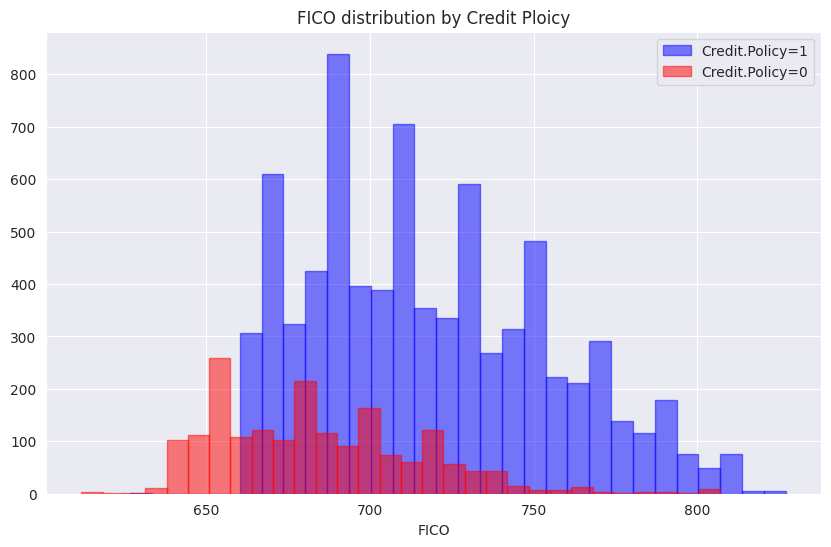

In [43]:
#created a histogram of two fico distributions on top of each other,selected by credit.policy outcome
plt.figure(figsize=(10,6))

loans[loans['credit.policy']==1]['fico'].hist(bins=30,alpha=0.5,label='Credit.Policy=1',color='blue',edgecolor='blue')
loans[loans['credit.policy']==0]['fico'].hist(bins=30,alpha=0.5,label='Credit.Policy=0',color='red',edgecolor='red')

plt.xlabel('FICO')
plt.title('FICO distribution by Credit Ploicy')
plt.legend()
plt.show()



created a similar figure ,except this time selected by the not.fully.column

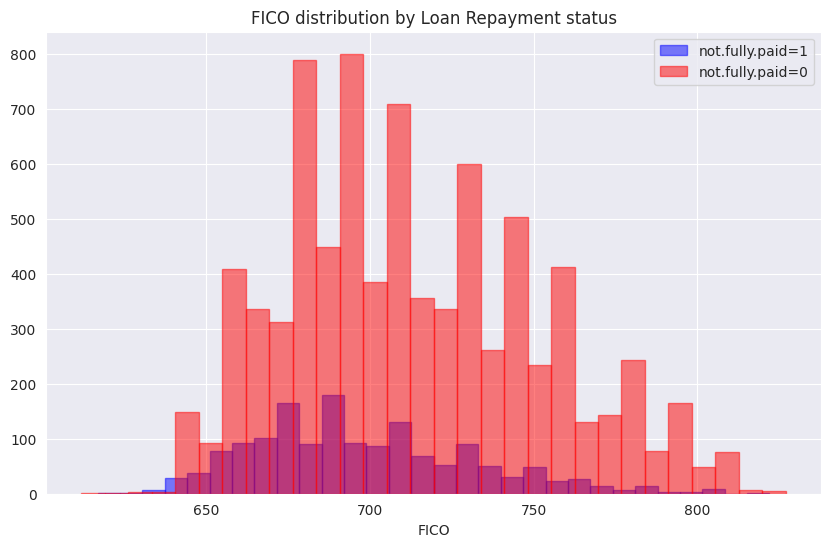

In [44]:
plt.figure(figsize=(10,6))

loans[loans['not.fully.paid']==1]['fico'].hist(bins=30,alpha=0.5,label='not.fully.paid=1',color='blue',edgecolor='blue')
loans[loans['not.fully.paid']==0]['fico'].hist(bins=30,alpha=0.5,label='not.fully.paid=0',color='red',edgecolor='red')

plt.xlabel('FICO')
plt.title('FICO distribution by Loan Repayment status')
plt.legend()
plt.show()

created a countplot using seaborn showing the counts of loans by purpose,with the color hue defined by not.fully.paid

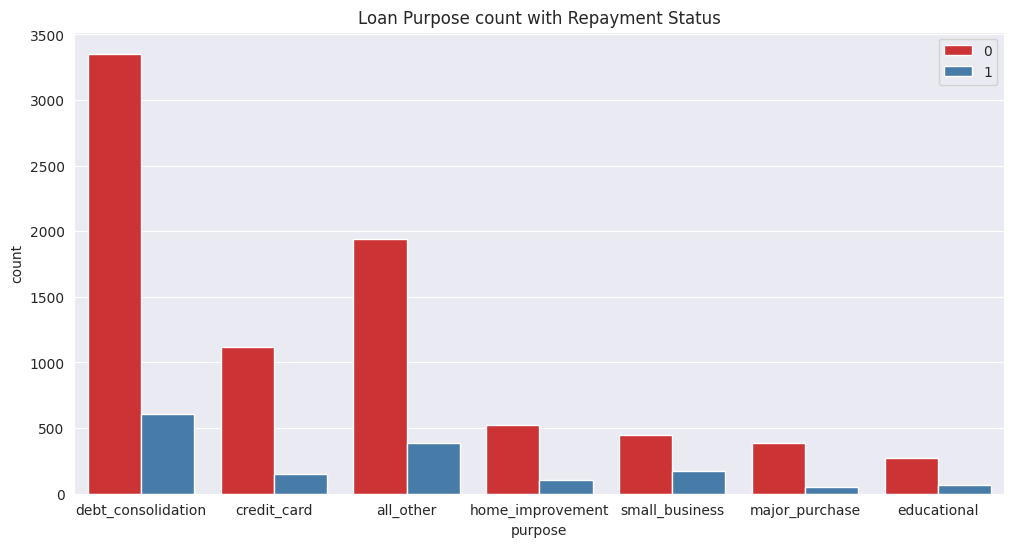

In [45]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,6))
sns.countplot(data=loans,x='purpose',hue='not.fully.paid',palette='Set1')
plt.title('Loan Purpose count with Repayment Status')
plt.legend()
plt.show()



Let's see the trend between FICO score and interest rate. Recreated the following jointplot.

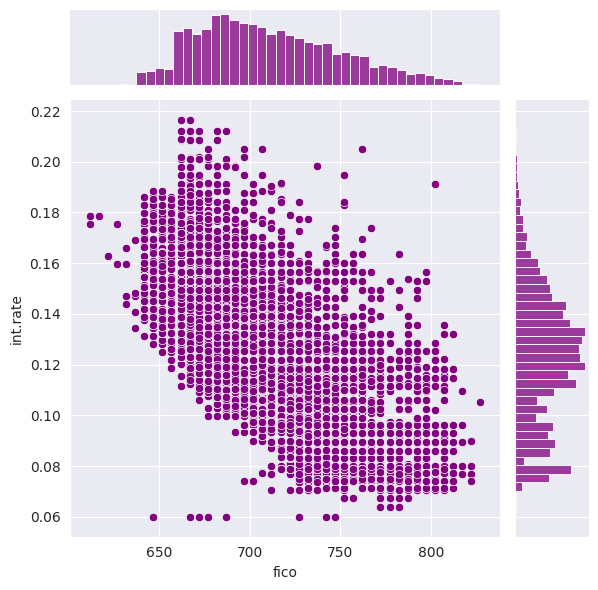

In [46]:
sns.jointplot(data=loans,x='fico',y='int.rate',color='purple')
plt.show()

Created the lmplots to see if the trend differed between not.fully.paid and credit.policy

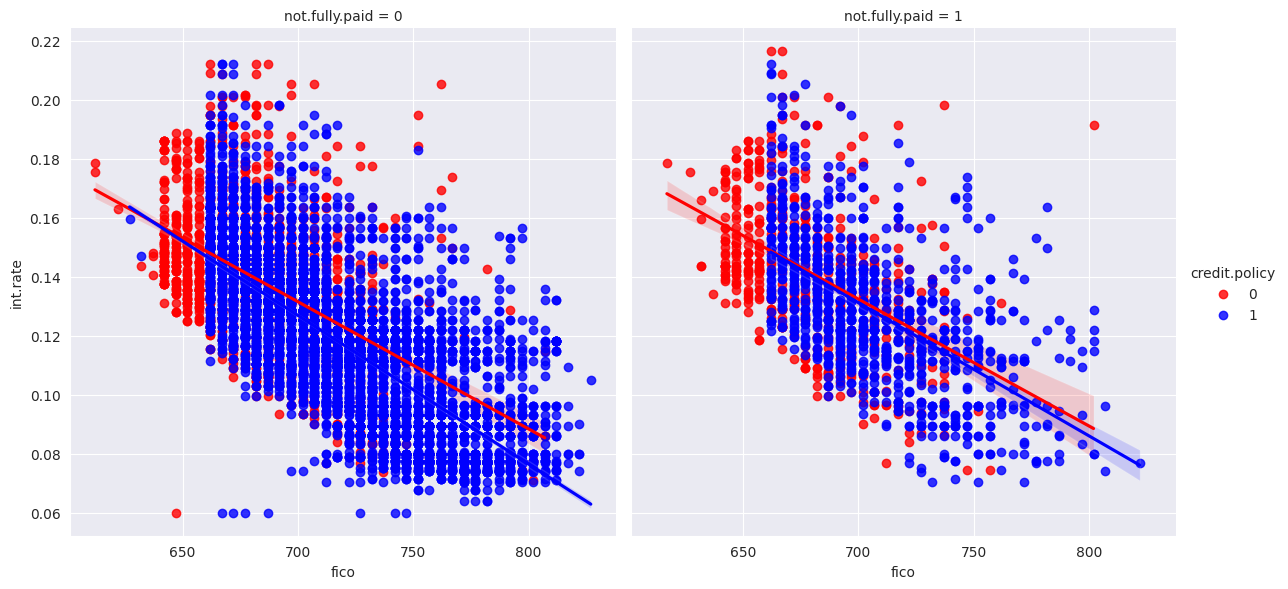

In [47]:
sns.set_style('darkgrid')

palette_color={1:'blue',0:'red'}
sns.lmplot(data=loans,x='fico',y='int.rate',hue='credit.policy',col='not.fully.paid',palette=palette_color,height=6,aspect=1)

plt.show()

# Setting up the Data
checking the loans.info() again

In [48]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


## Categorical Features

Create a list of 1 element containing the string 'purpose'. Call this list cat_feats.

In [49]:
cat_feats=['purpose']

using pd.get_dummies to create  a fixed larger dataframe that has new feature columns with dummy variables.setting this dataframe as final_data

In [50]:
final_data=pd.get_dummies(loans,columns=cat_feats,drop_first=True)

In [51]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

# Train Test Split

In [52]:

#here we are using sklearn to split our data intp a training and testing set
from sklearn.model_selection import train_test_split


X=final_data.drop('not.fully.paid',axis=1)
y=final_data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Training a Decision Tree Model

Importing DecisionTreeClassifier

In [53]:
from sklearn.tree import DecisionTreeClassifier

Creating an instance of DecisionTreeClassifier() called dtree

In [54]:
dtree=DecisionTreeClassifier(random_state=101)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=101)

In [55]:
print(dtree)

DecisionTreeClassifier(random_state=101)


In [56]:
from pprint import pprint
pprint(dtree.get_params())

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 101,
 'splitter': 'best'}


#Predictions and Evaluation of Decision Tree

creating predictions from the test set and create a classification report and a confusion matrix

In [57]:
from sklearn.metrics import classification_report,confusion_matrix

In [58]:
predictions=dtree.predict(X_test)

In [59]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83      2431
           1       0.19      0.24      0.21       443

    accuracy                           0.72      2874
   macro avg       0.52      0.53      0.52      2874
weighted avg       0.75      0.72      0.74      2874



In [60]:
print(confusion_matrix(y_test,predictions))

[[1975  456]
 [ 336  107]]


#Training the random forest model

Creating an instance of the randomforestclassifier class and fit it to our training data from the previous step

In [61]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
#creating an random forest instance
rfc=RandomForestClassifier(n_estimators=600)

In [63]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=600)

In [64]:
print(rfc)

RandomForestClassifier(n_estimators=600)


#Predictions and Evaluation
Predicting off the y_test values and evaluate our model

In [65]:
#predict the class of not.fully.paid for the X_test data
rfc_predictions=rfc.predict(X_test)

 Created a classification report from the results.

In [66]:

from sklearn.metrics import classification_report,confusion_matrix

In [67]:
print(classification_report(y_test,rfc_predictions))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.52      0.02      0.05       443

    accuracy                           0.85      2874
   macro avg       0.69      0.51      0.48      2874
weighted avg       0.80      0.85      0.78      2874



Showing the Confusion Matrix for the predictions.

In [68]:
print(confusion_matrix(y_test,rfc_predictions))

[[2421   10]
 [ 432   11]]


What performed better the random forest or the decision tree?

In [69]:
print('Random Forest')

Random Forest
